In [1]:
"""A design example of a fully configured slab-column
configuration.

The calculation is consistent with EC2 §6.4.
"""
import matplotlib.pyplot as plt

from dx_punch.EC2.slab import Slab
from dx_eurocode.EC2.materials import RC
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
# A tentative input data-structure
input_data = {
    'slab': {
        'geometry': {
            'shape': 'generic',
            'vertices': [
                (0., 0.), (6.25, 0.), (7.25, 1.), (7.25, 11.45),
                (0., 11.45),
                ],
            'thickness': 0.30,
            },
        'materials': {
            'concrete': 'C30',
            'steel': None
            },
        'reinforcement': {
            'entire-slab': [{
                'axes': 'xy',
                'phi': 0.010,
                's': 0.200, # spacing
                'd': 0.27 # effective depth
                },{
                'axes': 'xy',
                'phi': 0.010,
                's': 0.200, # spacing
                'd': 0.29 # effective depth
                },
                ],
            'partial': [{
                'geometry': {
                    'shape': 'rectangle',
                    'bx': 1.5,
                    'by': 10.,
                    'position': 'lower-left'
                    },
                'axes': 'x',
                'phi': 0.010,
                's': 0.200, # spacing
                'd': 0.23 # effective depth
                },
                ],
            },
        'columns': [{
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (0.125, 11.325),
                },
            'forces': {
                'N': 111e+03,
                'Mex': 25e+03,
                'Mey': 22e+03,
                }
            }, {
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (0.125, 5.725)
                },
            'forces': {
                'N': 266e+03,
                'Mex': 42e+03,
                'Mey': 0.,
                }
            }, {
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (0.125, 0.125),
                },
            'forces': {
                'N': 112e+03,
                'Mex': 25e+03,
                'Mey': 22e+03,
                }
            }, {
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (6.125, 11.325),
                },
            'forces': {
                'N': 252e+03,
                'Mex': 3e+03,
                'Mey': 36e+03,
                }
            }, {
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (6.125, 5.725), 
                },
            'forces': {
                'N': 664e+03,
                'Mex': 8e+03,
                'Mey': 1e+03,
                }
            }, {
            'geometry': {
                'shape': 'rectangle',
                'bx': 0.25,
                'by': 0.25,
                'origin': (6.125, 0.125),
                },
            'forces': {
                'N': 246e+03,
                'Mex': 6e+03,
                'Mey': 34e+03,
                }
            }, 
            ]
        }
    }

In [3]:
# Configure the slab
slab_data = input_data['slab']
slab = Slab.new(**slab_data['geometry'], material=RC[int(slab_data['materials']['concrete'][1:])])
# -> reinforcement distribution
for rebar in slab_data['reinforcement']['entire-slab']:
    slab.add_uniform_rebar(phi=rebar['phi'], s=rebar['s'], d=rebar['d'], axes=rebar['axes'])
for rebar in slab_data['reinforcement']['partial']:
    slab.add_partial_rebar(phi=rebar['phi'], s=rebar['s'], d=rebar['d'], axes=rebar['axes'], **rebar['geometry'])

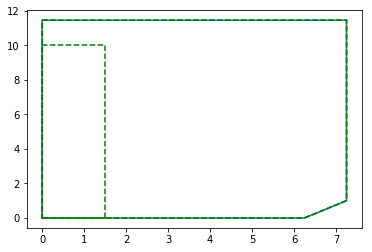

In [4]:
# -> Visualize slab and reinforcement areas
plt.plot(slab.boundary.xy[0], slab.boundary.xy[1])
for i, rebar in enumerate(slab.rebar):
    plt.plot(rebar.geometry.boundary.xy[0], rebar.geometry.boundary.xy[1], 'g--')

In [5]:
# -> Add columns
for column in slab_data['columns']:
    slab.add_column(**column['geometry'], **column['forces'])

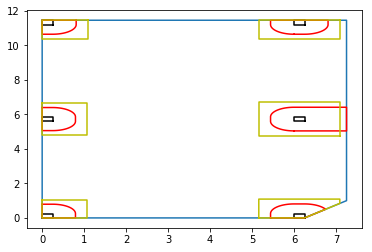

In [6]:
plt.plot(slab.boundary.xy[0], slab.boundary.xy[1])
for column in slab.columns:
    plt.plot(column.boundary.xy[0], column.boundary.xy[1], 'k')
    u = column.ui
    plt.plot(u.boundary.xy[0], u.boundary.xy[1], 'r')
    plt.plot(column.tensile.effective_region.boundary.xy[0], column.tensile.effective_region.boundary.xy[1], 'y')

In [7]:
for i, column in enumerate(slab.columns):
    print(f'==> Column {i+1}:')
    column.print()

==> Column 1:
  -> Column "C9272": 
       - Results:
         * Position: corner
         * Geometry:
           + Centroid:
             - x [m]: 0.125
             - y [m]: 11.325
           + Bounding box:
             - bx [mm]: 250.0
             - by [mm]: 250.0
         * Effective depth [mm]: 280.0
         * Tensile Reinforcement:
           + Effective tensile region:
             - bx [mm]: 1090.0
             - by [mm]: 1090.0
             - Centroid (offset):
               * dx [mm]: 420.0
               * dy [mm]: -420.0
           + x-axis: T10@200 + T10@200
           + y-axis: T10@200 + T10@200
           + ρx: 0.0028
           + ρy: 0.0028
           + ρl: 0.0028
         * Design:
           + Perimeter u0:
             - Most adverse loadcase:
               * name: LC0
               * Ved [kN]: 111.0
               * Mex [kN.m]: 25.0
               * Mey [kN.m]: 22.0
               * ex [mm]: -198.2
               * ey [mm]: 225.2
             - β: 2.919
      